In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import DBSCAN

In [9]:
# Load the cleaned crime incidents data
df = pd.read_csv(r'C:\Users\manik\OneDrive\Documents\GitHub\geospatial-analysis\Crime Incidents in 2024\Crime_Incidents_in_2024_Cleaned.csv')

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [10]:
# Plot the crime incidents on a map using Folium
m = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], zoom_start=12)

for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

m.save('Crime_Incidents_Map.html')

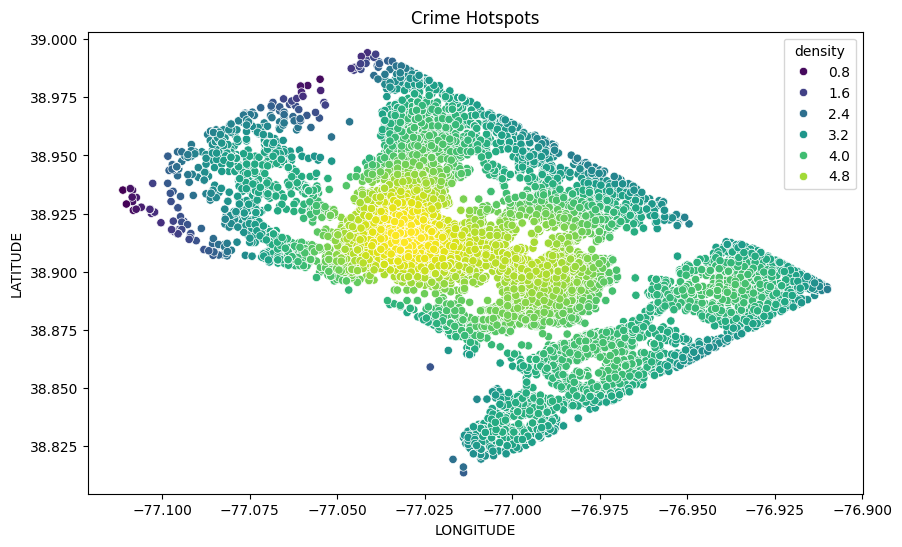

In [20]:
# Perform hotspot analysis using kernel density estimation
from sklearn.neighbors import KernelDensity

# Fit the model on the coordinates
coords = df[['LATITUDE', 'LONGITUDE']].values
kde = KernelDensity(bandwidth=0.01).fit(coords)

# Score samples to get density values
density = kde.score_samples(coords)

# Add density values to the DataFrame
df['density'] = density

# Plot the density values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='density', data=df, palette='viridis')
plt.title('Crime Hotspots')
plt.show()

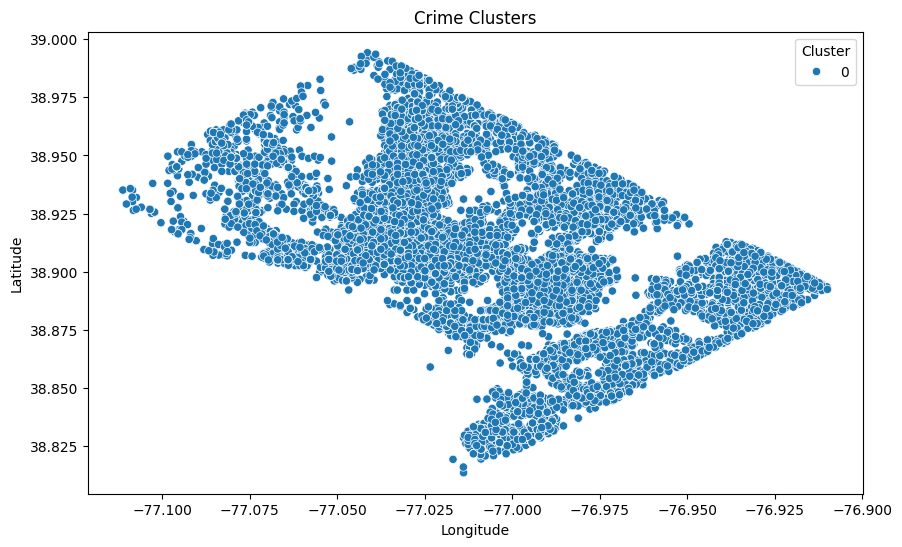

In [17]:
from sklearn.cluster import DBSCAN

# Perform clustering using DBSCAN
coords = df[['LATITUDE', 'LONGITUDE']].values
db = DBSCAN(eps=0.01, min_samples=5).fit(coords)
df['cluster'] = db.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='cluster', palette='tab10', data=df)
plt.title('Crime Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

# Visualize clusters on a map using Folium
m = folium.Map(location=[df.LATITUDE.mean(), df.LONGITUDE.mean()], zoom_start=12)

# Define colors for clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=3,
        color=colors[row['cluster'] % len(colors)],
        fill=True,
        fill_color=colors[row['cluster'] % len(colors)]
    ).add_to(m)

m.save('Crime_Clusters_Map.html')

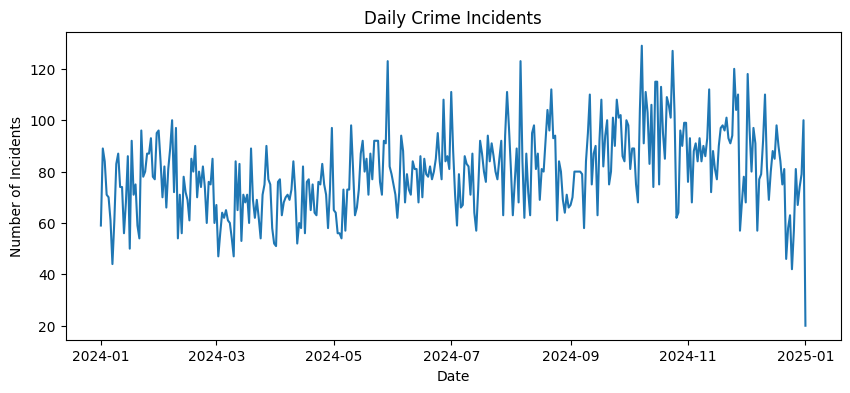

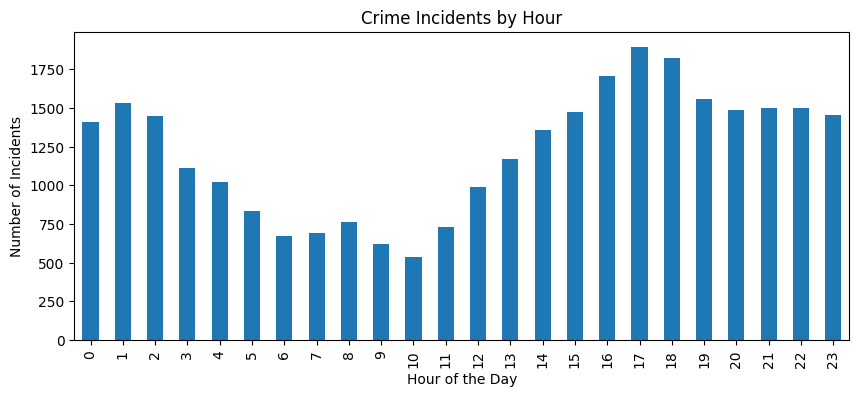

In [13]:
# Convert REPORT_DAT to datetime
df['REPORT_DAT'] = pd.to_datetime(df['REPORT_DAT'])

# Plot daily crime count
daily_counts = df.groupby(df['REPORT_DAT'].dt.date).size()
plt.figure(figsize=(10, 4))
daily_counts.plot()
plt.title('Daily Crime Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()

# Plot crime incidents by hour
hourly_counts = df.groupby(df['REPORT_DAT'].dt.hour).size()
plt.figure(figsize=(10, 4))
hourly_counts.plot(kind='bar')
plt.title('Crime Incidents by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.show()

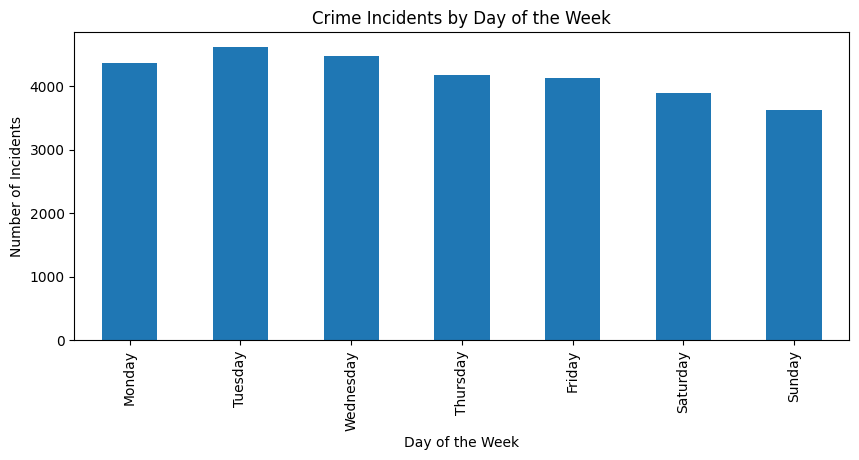

In [14]:
# Plot crime incidents by day of the week
df['day_of_week'] = df['REPORT_DAT'].dt.day_name()
weekly_counts = df.groupby('day_of_week').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(10, 4))
weekly_counts.plot(kind='bar')
plt.title('Crime Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()

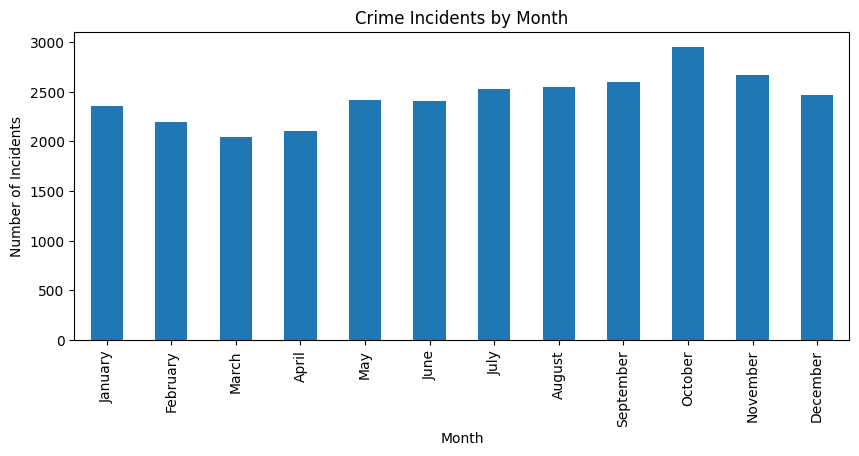

In [15]:
# Plot crime incidents by month
df['month'] = df['REPORT_DAT'].dt.month_name()
monthly_counts = df.groupby('month').size().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(10, 4))
monthly_counts.plot(kind='bar')
plt.title('Crime Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

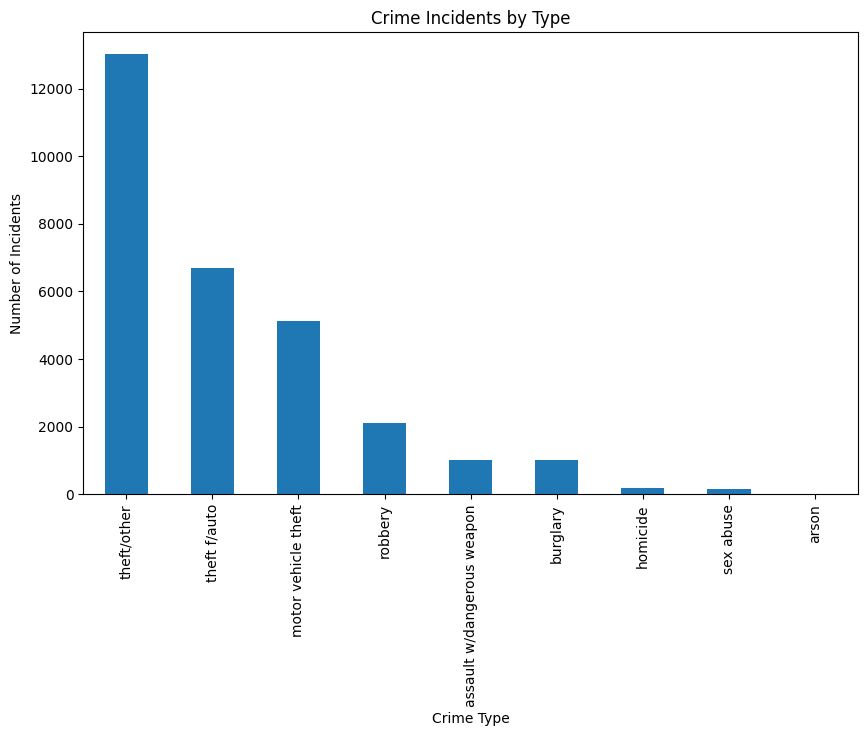

In [16]:
# Plot crime incidents by type
crime_type_counts = df['OFFENSE'].value_counts()
plt.figure(figsize=(10, 6))
crime_type_counts.plot(kind='bar')
plt.title('Crime Incidents by Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.show()